In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.option_context('mode.use_inf_as_na', True)

### Data Load & Process

In [34]:
df = pd.read_csv(f"data/2-intermediate/out_df2.csv")

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,hardship_status_filled,loan_id_extracted,emp_title_clean,emp_title_manager,emp_length_clean,Job Title,Category,fico_range_change,debt_to_income,int_rate_clean,term_numeric,interest_per_loan_amnt,grade_encoded,emp_title_clean_encoded
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,0.0,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,167338079,cashier,False,10.0,NaN,NaN,0.0,0.083333,0.1308,36,1569.6,1,4396
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5

In [35]:
from scipy.stats import skew


# function for outputting summary statistics for  dataframe
def summary_statistics(df:pd.DataFrame, col_name:str):
    """
    Takes as input a dataframe and a column name, and oututs the following summary statistics: mean, median, mode, std deviation and 25th, 50th and 75th percentiles.
    """
    # calculating sumamry statistics
    mean_loan = df[col_name].mean()
    median_loan = df[col_name].median()
    mode_loan = df[col_name].mode()[0]
    std_loan = df[col_name].std()
    percentiles_loan = df[col_name].quantile([0.25, 0.5, 0.75])
    skewness_value = skew(df[col_name])

    print(f"Mean Loan Amount: {mean_loan}")
    print(f"Median Loan Amount: {median_loan}")
    print(f"Mode Loan Amount: {mode_loan}")
    print(f"Standard Deviation of Loan Amount: {std_loan}")
    print(f"Loan Amount Percentiles: \n{percentiles_loan}")
    print("Skewness:", skewness_value)

    # skewness
    if skewness_value == 0:
        print("Skewness = 0: Data is perfectly symmetric.")
    elif skewness_value > 0:
        print("Skewness > 0: Positive skew (right skew).")
    else:
        print("Skewness < 0: Negative skew (left skew).")

In [36]:
summary_statistics(df, "loan_amnt")

Mean Loan Amount: 15332.373
Median Loan Amount: 13000.0
Mode Loan Amount: 10000.0
Standard Deviation of Loan Amount: 9468.189883370933
Loan Amount Percentiles: 
0.25     8000.0
0.50    13000.0
0.75    20000.0
Name: loan_amnt, dtype: float64
Skewness: 0.7887250378394999
Skewness > 0: Positive skew (right skew).


In [37]:
# Now we can test our function on 'int_rate' column
df['int_rate_clean'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

summary_statistics(df, "int_rate_clean")

Mean Loan Amount: 0.13056737399999999
Median Loan Amount: 0.1249
Mode Loan Amount: 0.0819
Standard Deviation of Loan Amount: 0.048769601321768614
Loan Amount Percentiles: 
0.25    0.0917
0.50    0.1249
0.75    0.1601
Name: int_rate_clean, dtype: float64
Skewness: 0.7750035519672701
Skewness > 0: Positive skew (right skew).


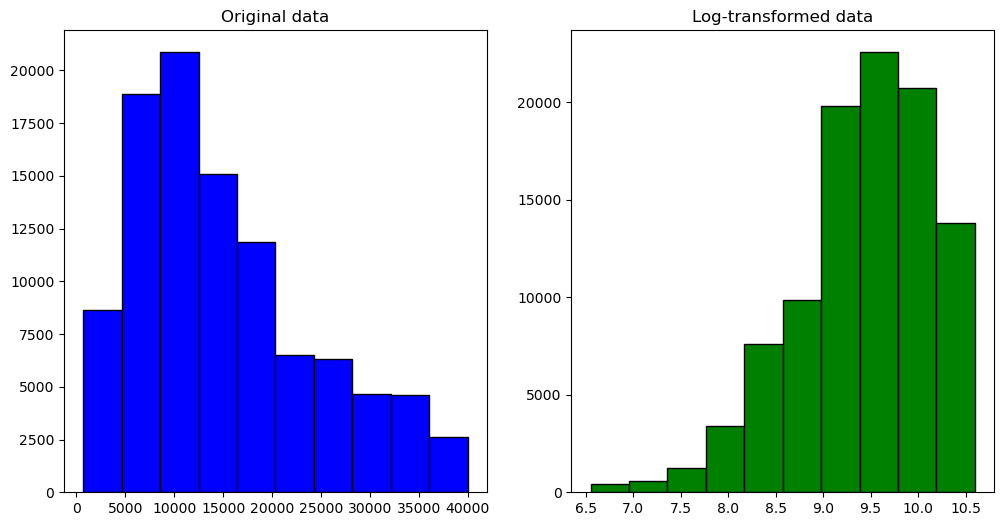

Skewness before log transform: 0.7887250378394999
Skewness after log transform: -0.6505299680118821


In [38]:

import matplotlib.pyplot as plt

# Log transformation
df['loan_amnt_log'] = np.log(df['loan_amnt'] + 1) # Adding +1 to avoid log(0)

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['loan_amnt'], bins=10, color='blue', edgecolor='black')
plt.title('Original data')

plt.subplot(1, 2, 2)
plt.hist(df['loan_amnt_log'], bins=10, color='green', edgecolor='black')
plt.title('Log-transformed data')

plt.show()

print(f"Skewness before log transform: {skew(df['loan_amnt'])}")
print(f"Skewness after log transform: {skew(df['loan_amnt_log'])}")

# EDA

In [39]:
# Calculating Summary Statistics
mean_loan = df['loan_amnt'].mean()
median_loan = df['loan_amnt'].median()
mode_loan = df['loan_amnt'].mode()[0]
std_loan = df['loan_amnt'].std()
percentiles_loan = df['loan_amnt'].quantile([0.25, 0.5, 0.75])
skewness_value = skew(df['loan_amnt'])

print(f"Mean Loan Amount: {mean_loan}")
print(f"Median Loan Amount: {median_loan}")
print(f"Mode Loan Amount: {mode_loan}")
print(f"Standard Deviation of Loan Amount: {std_loan}")
print(f"Loan Amount Percentiles: \n{percentiles_loan}")
print("Skewness:", skewness_value)

Mean Loan Amount: 15332.373
Median Loan Amount: 13000.0
Mode Loan Amount: 10000.0
Standard Deviation of Loan Amount: 9468.189883370933
Loan Amount Percentiles: 
0.25     8000.0
0.50    13000.0
0.75    20000.0
Name: loan_amnt, dtype: float64
Skewness: 0.7887250378394999


Correlations and relationships

In [40]:
display(df.head(2))

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,hardship_status_filled,loan_id_extracted,emp_title_clean,emp_title_manager,emp_length_clean,Job Title,Category,fico_range_change,debt_to_income,int_rate_clean,term_numeric,interest_per_loan_amnt,grade_encoded,emp_title_clean_encoded,loan_amnt_log
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.95,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,0.0,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,167338079,cashier,False,10.0,NaN,NaN,0.0,0.083333,0.1308,36,1569.6,1,4396,8.294300
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.16,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0

In [41]:
status_rank = {
    'Fully Paid': 3,
    'Current': 3,
    'Late (31-120 days)': 2,
    'Late (16-30 days)': 2,
    'In Grace Period': 2,
    'Default': 1,
    'Charged Off': 1
}

df['loan_status_rank'] = df['loan_status'].map(status_rank)

df[['loan_status', 'loan_status_rank']].head()

,loan_status,loan_status_rank
0,Current,3.0
1,Current,3.0
2,Fully Paid,3.0
3,Current,3.0
4,Fully Paid,3.0


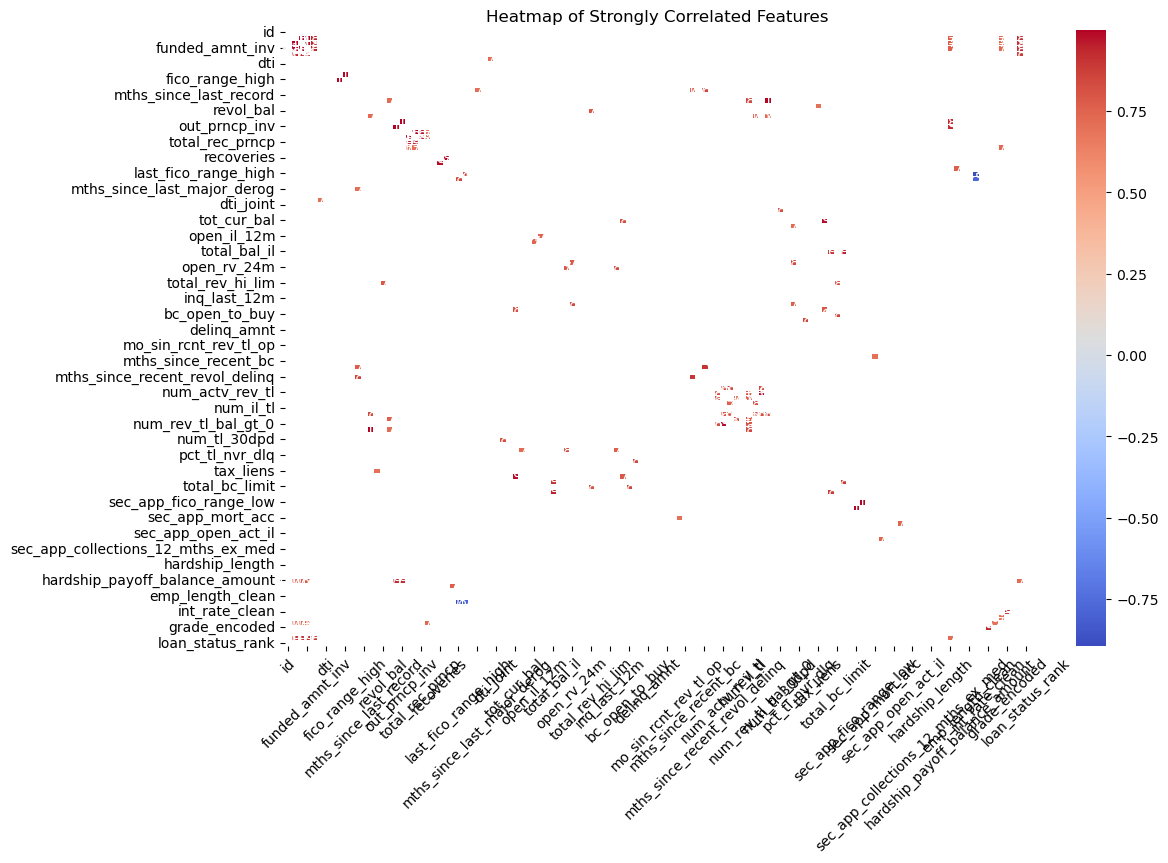

In [42]:
numeric_df = df.select_dtypes(include='number').copy()
corr_matrix = numeric_df.corr()
threshold = 0.7 # i don't want anything with less than 60% correlation
filtered_corr = corr_matrix[(abs(corr_matrix) >= threshold) & (corr_matrix != 1.0)]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', linewidths=0.5, mask=filtered_corr.isnull(), cbar=True)
plt.title('Heatmap of Strongly Correlated Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [43]:
loan_status_corr = numeric_df.corr()['loan_status_rank']
ranked_corr = loan_status_corr.abs().sort_values(ascending=False)
ranked_corr


loan_status_rank                              1.000000
last_fico_range_high                          0.615633
fico_range_change                             0.608217
last_fico_range_low                           0.564054
recoveries                                    0.543070
collection_recovery_fee                       0.523635
hardship_length                               0.294925
deferral_term                                 0.294925
hardship_amount                               0.276308
grade_encoded                                 0.240955
total_rec_prncp                               0.235667
int_rate_clean                                0.206496
last_pymnt_amnt                               0.191264
out_prncp                                     0.187046
out_prncp_inv                                 0.187033
loan_id_extracted                             0.150990
id                                            0.150990
total_pymnt                                   0.143045
total_pymn

Features > 20% or 25% to be considered for modelling

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


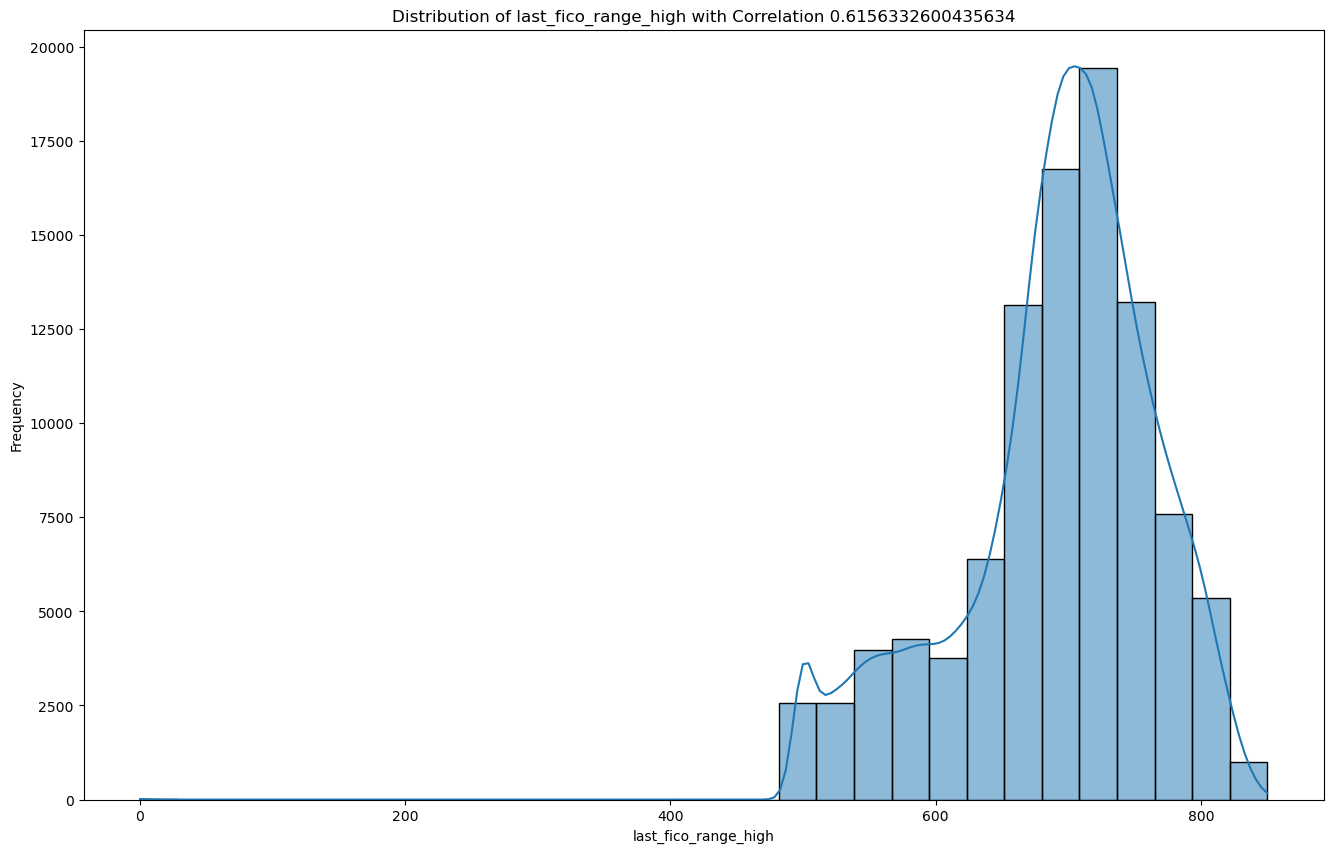

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


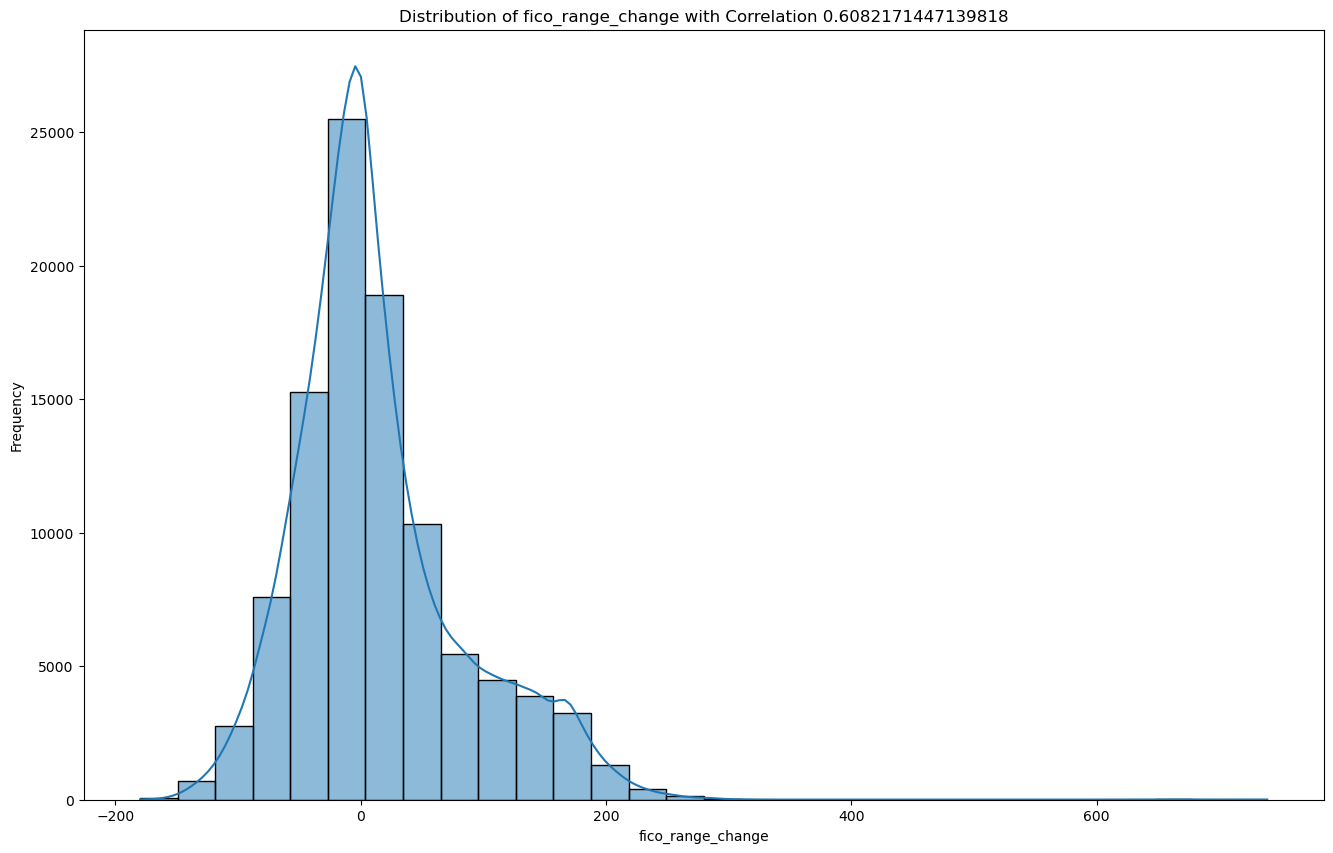

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


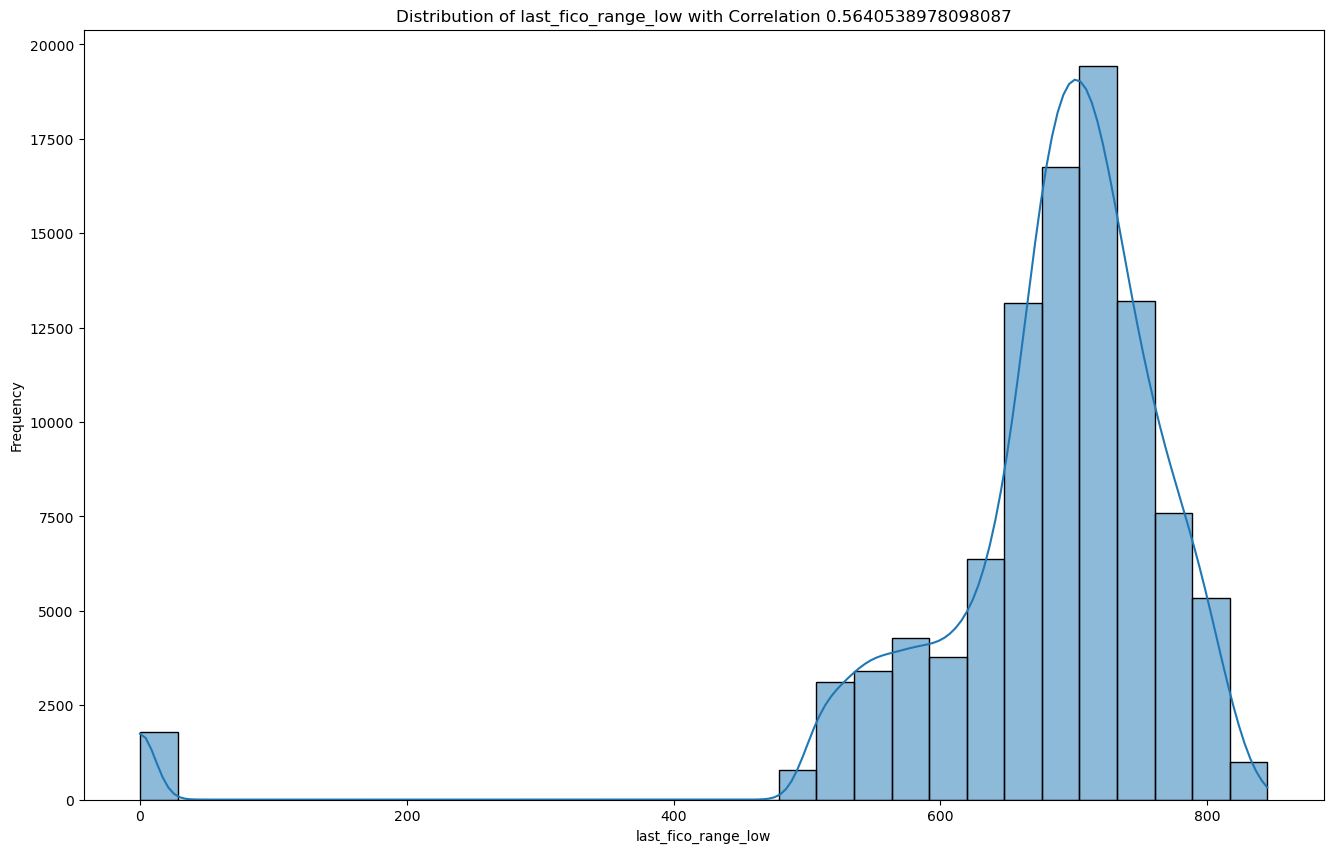

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


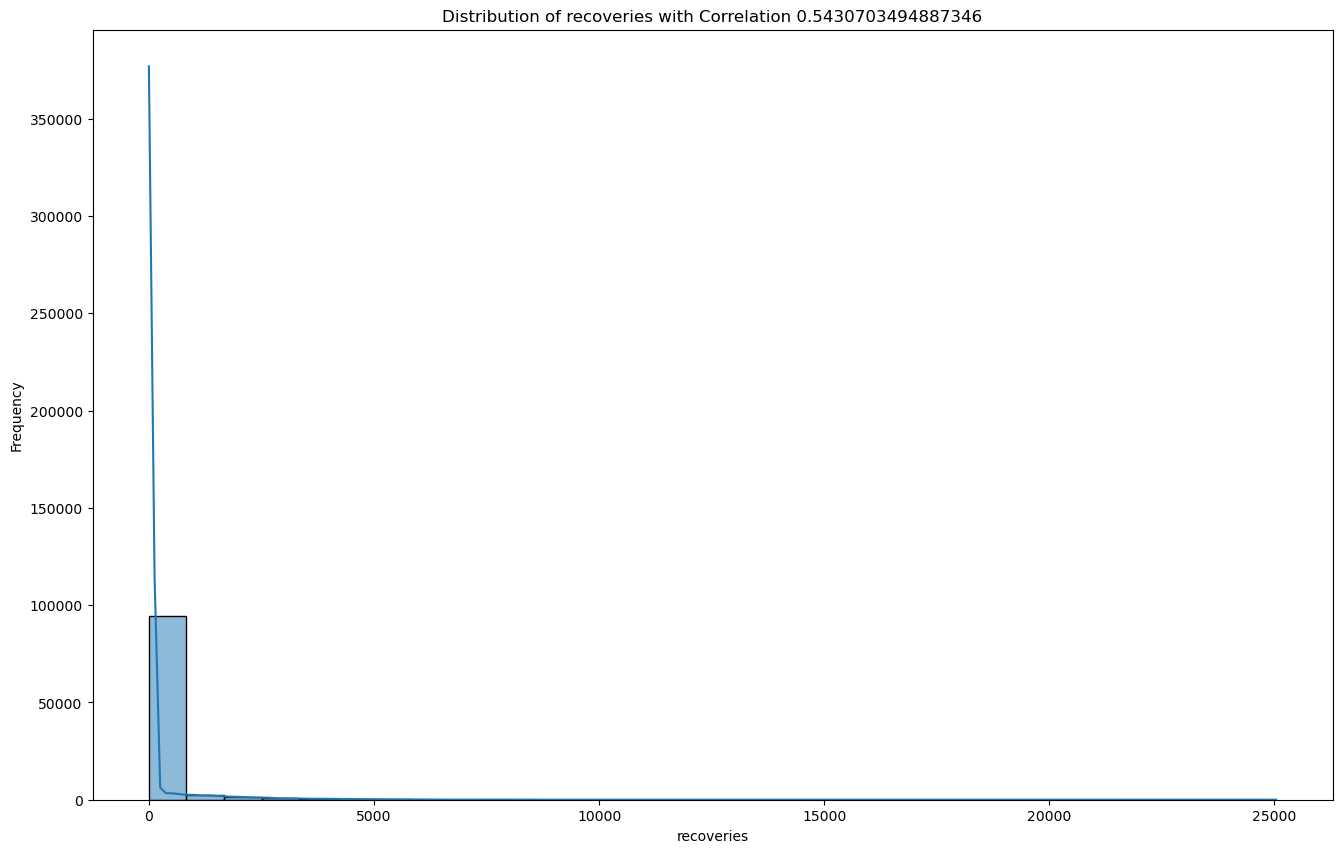

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


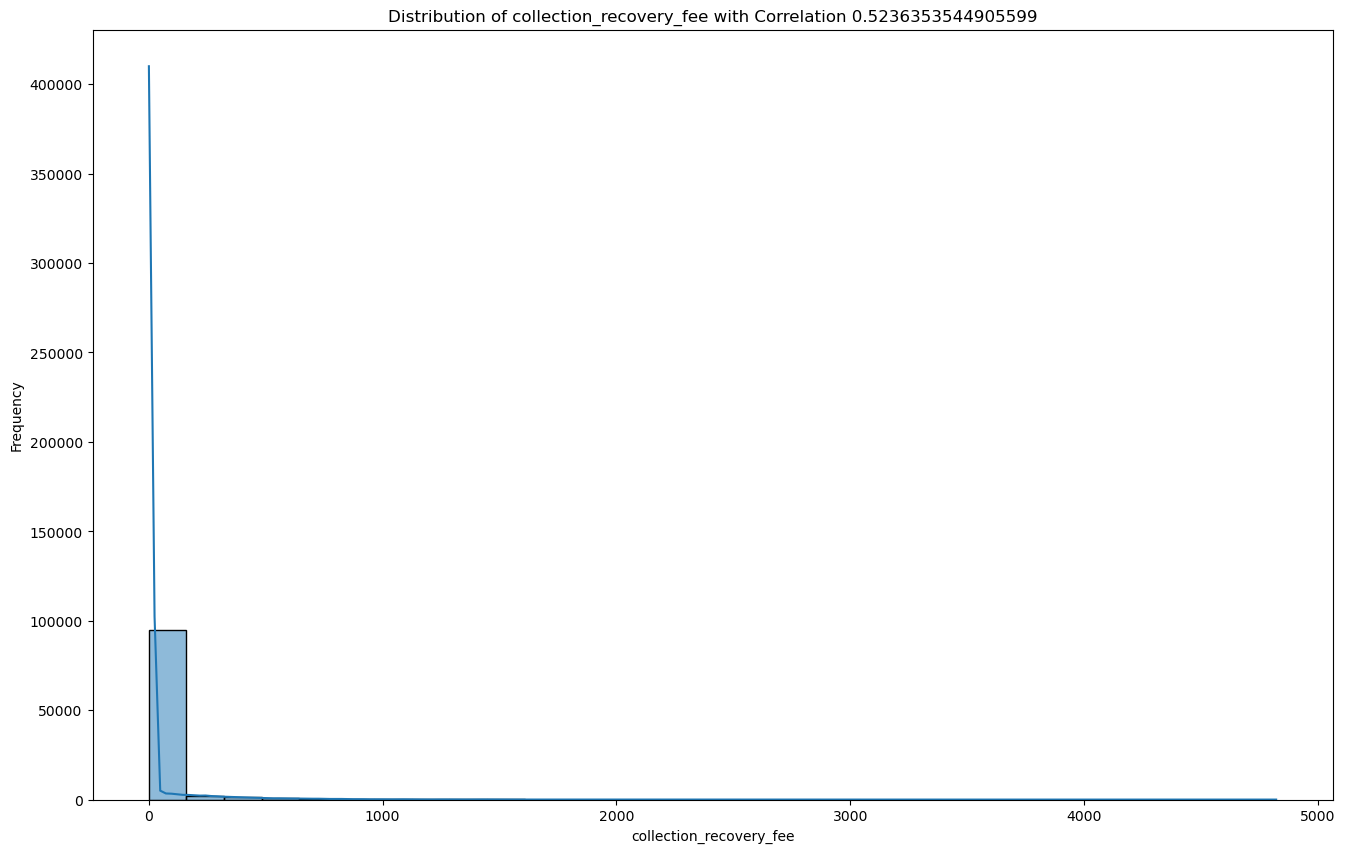

In [44]:
highest_corr_features = ranked_corr[ranked_corr > 0.3].index.drop('loan_status_rank')

for feature in highest_corr_features:
    plt.figure(figsize=(16,10))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} with Correlation {ranked_corr[feature]}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [45]:
numeric_df = numeric_df.replace(np.inf, np.nan)

scaler = StandardScaler()

numeric_df_copy = numeric_df.copy()

std_data = scaler.fit_transform(numeric_df_copy.fillna(0))
numeric_df_std = pd.DataFrame(std_data, columns=numeric_df_copy.columns)

numeric_df_std.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,loan_id_extracted,emp_length_clean,fico_range_change,debt_to_income,int_rate_clean,term_numeric,interest_per_loan_amnt,grade_encoded,emp_title_clean_encoded,loan_amnt_log,loan_status_rank
0,1.357716,-1.196895,-1.196554,-1.194530,-1.160271,-0.367206,0.054251,0.868556,-1.054388,-1.054363,-0.642530,0.106983,3.491165,-1.336108,1.493062,-0.665478,-0.998744,-0.028892,-0.028815,-1.189143,-1.188125,-1.122022,-0.866238,-0.130474,-0.206638,-0.199219,-0.545723,-0.286720,-0.109895,6.808348,-0.498829,0.0,-0.243996,-0.255787,-0.054517,2.185932,0.696247,-0.627622,-0.349244,-0.580926,-0.089788,0.093202,-0.379953,0.375075,-0.639807,-0.755280,-0.785258,0.628598,-0.924189,0.180676,-0.447807,-0.647524,-1.072231,3.087920,-0.691049,-1.811840,-0.080264,-0.015407,0.998345,-0.994886,1.334061,0.852284,0.278375,-0.754925,0.534102,1.619853,0.359877,0.387914,-1.492826,-0.994176,-1.505729,-1.348162,-0.449123,-1.238489,-1.028282,-1.002322,-1.256667,-0.020027,-0.044601,-0.162868,-1.097415,-1.001618,-1.075543,2.474387,-0.100539,1.173508,-0.771263,-0.996048,-0.566705,-0.199281,-0.268196,-0.268204,-0.141295,-0.174217,-0.229517,-0.240622,-0.178969,-0.221699,-0.031499,-0.051,-0.219628,-0.109649,-0.219628,-0.076864,-0.15503,-0.201597,-0.084565,1.357716,1.171900,-0.204893,-0.006543,0.004770,-0.648674,-0.845898,-0.451338,-1.398154,-1.574052,0.390617
1,-0.525502,0.915452,0.915966,0.917208,0.177135,-0.264024,0.348230,-0.345749,-0.610612,-0.610601,-0.642530,-0.716385,-0.386516,-0.293453,-0.322652,0.259106,-0.003350,0.040356,0.040438,1.251453,1.253354,1.125199,1.211184,-0.130474,-0.206638,-0.199219,-0.486733,0.180551,0.193912,-0.122326,-0.498829,0.0,-0.243996,-0.255787,-0.054517,-0.122267,-0.517803,-0.627622,0.350974,-0.580926,1.219075,0.005854,0.311579,0.792132,0.087189,-0.349427,-0.387731,0.886491,-0.008668,-0.561289,2.488219,-0.647524,-0.134950,-0.435481,-0.260177,-0.458459,-0.080264,-0.015407,0.432673,-0.381510,-0.397024,-0.121430,-0.794422,-0.538365,-0.444799,2.940213,-0.546486,-0.363320,-0.253075,-0.131598,0.076298,-0.302945,0.891611,-0.217410,-0.541461,-0.121867,-0.245925,-0.020027,-0.044601,-0.162868,-0.556763,0.220129,0.583255,-0.347872,-0.100539,-0.495628,0.192543,-0.465213,0.180271,-0.199281,-0.268196,-0.268204,-0.141295,-0.174217,-0.229

In [46]:
examples = pd.DataFrame([numeric_df_copy['loan_status_rank'], numeric_df_std['loan_status_rank']]).T
examples.columns = ['rank', 'rank_std']

examples.groupby('rank').mean()

,rank_std
rank,
1.0,-2.586081
2.0,-1.097732
3.0,0.390617


/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


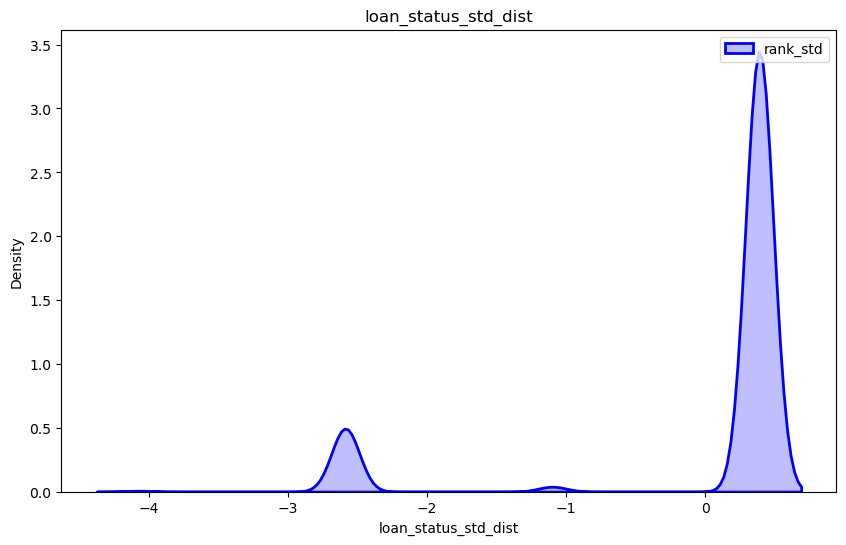

In [47]:
plt.figure(figsize=(10, 6))
sns.kdeplot(examples['rank_std'], color='blue', label=f'rank_std', fill=True, linewidth=2)
plt.title(f'loan_status_std_dist')
plt.xlabel('loan_status_std_dist')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Visually call -1.25 the danger done of deafaut when reviewing distributions below

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


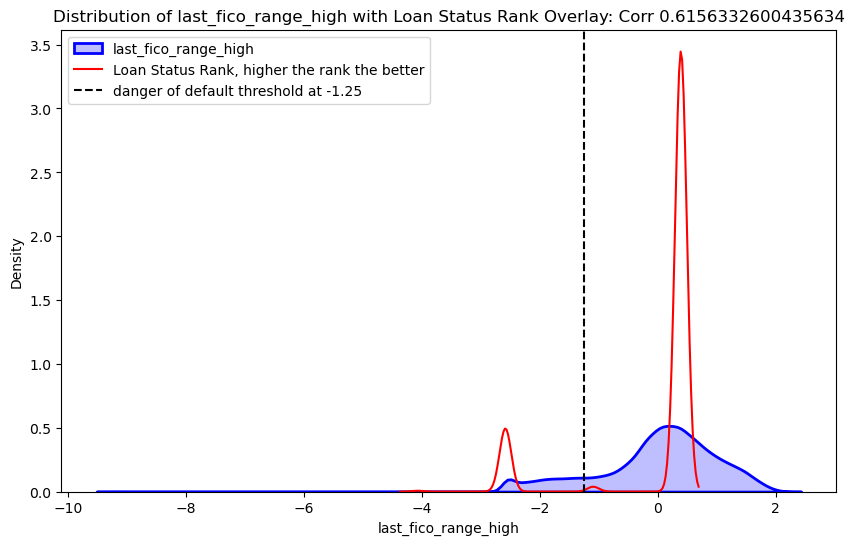

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


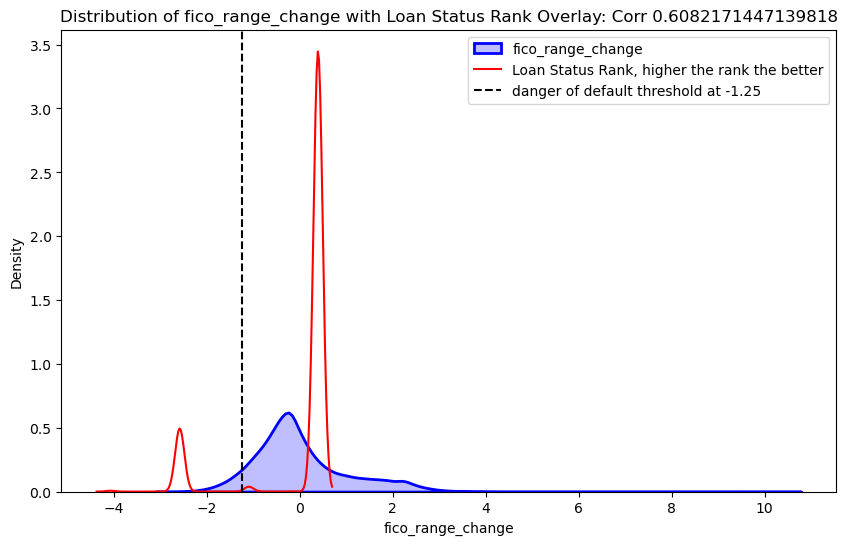

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


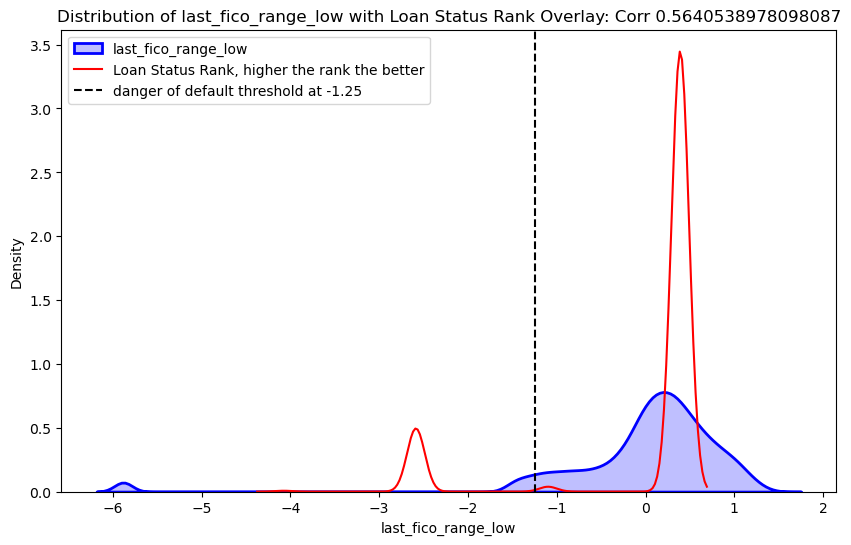

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


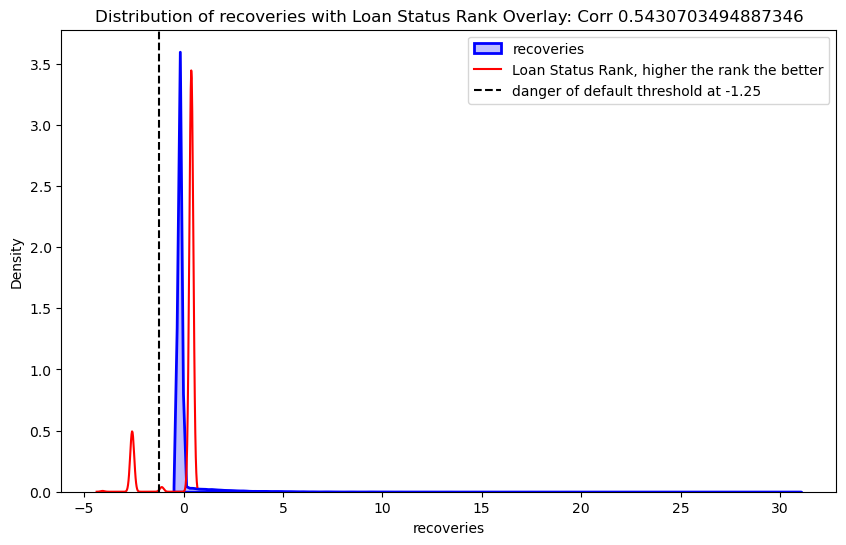

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


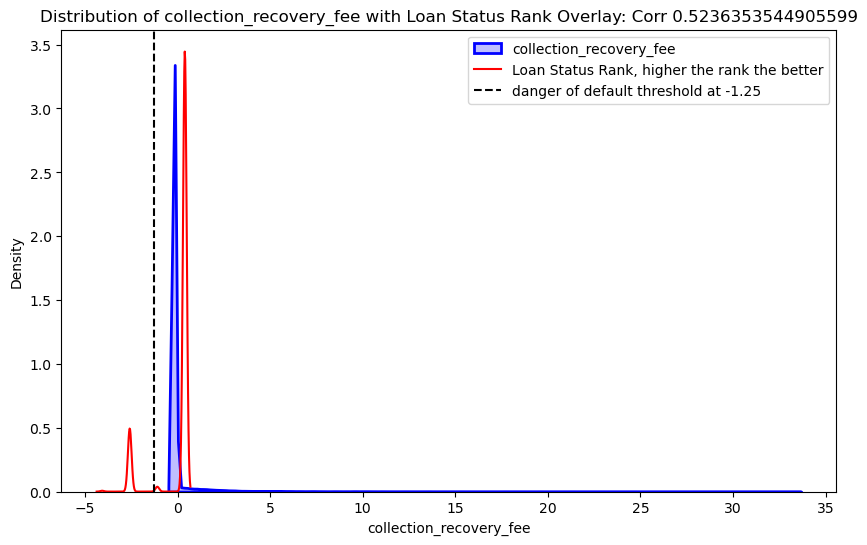

In [48]:

highest_corr_features = ranked_corr[ranked_corr > 0.3].index.drop('loan_status_rank')

for feature in highest_corr_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(numeric_df_std[feature], color='blue', label=f'{feature}', fill=True, linewidth=2)
    sns.kdeplot(numeric_df_std['loan_status_rank'], color='red', label='Loan Status Rank, higher the rank the better')
    plt.axvline(x=-1.25, color='black', linestyle='--', label='danger of default threshold at -1.25')
    plt.title(f'Distribution of {feature} with Loan Status Rank Overlay: Corr {ranked_corr[feature]}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


#### not perfect but some features like hardship, fico and collection recovery show clear points that differentiate defaulters and full payers.

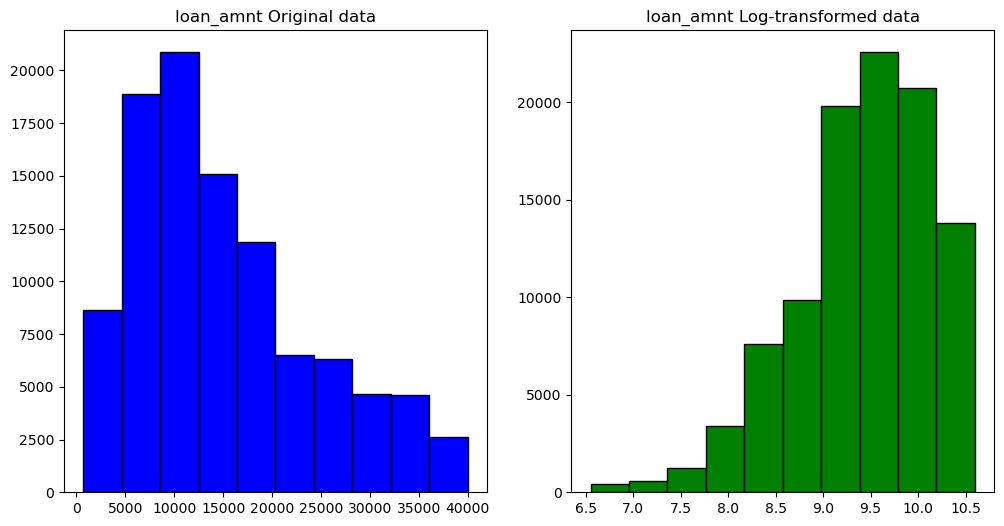

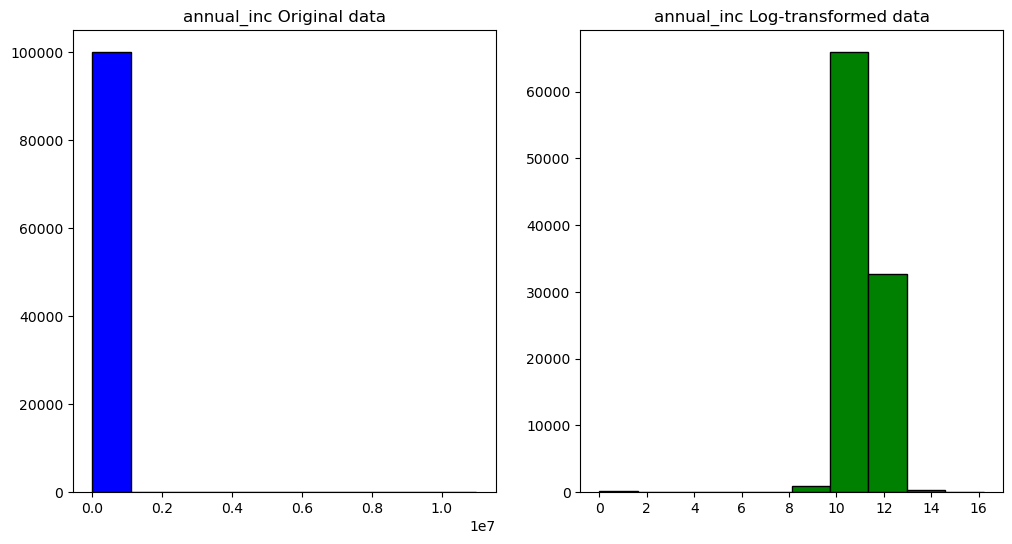

loan_amnt Skewness before log transform: 0.7887250378394999
loan_amnt Skewness after log transform: -0.6505299680118821
annual_inc Skewness before log transform: 47.014849706413735
annual_inc Skewness after log transform: -4.618870706105246


In [49]:
# Log transformation
df[['loan_amnt_log', 'annual_inc_log']] = np.log(df[['loan_amnt', 'annual_inc']] + 1) # need to avoid log(0)

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['loan_amnt'], bins=10, color='blue', edgecolor='black')
plt.title('loan_amnt Original data')

plt.subplot(1, 2, 2)
plt.hist(df['loan_amnt_log'], bins=10, color='green', edgecolor='black')
plt.title('loan_amnt Log-transformed data')

plt.show()

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['annual_inc'], bins=10, color='blue', edgecolor='black')
plt.title('annual_inc Original data')

plt.subplot(1, 2, 2)
plt.hist(df['annual_inc_log'], bins=10, color='green', edgecolor='black')
plt.title('annual_inc Log-transformed data')

plt.show()

print(f"loan_amnt Skewness before log transform: {skew(df['loan_amnt'])}")
print(f"loan_amnt Skewness after log transform: {skew(df['loan_amnt_log'])}")

print(f"annual_inc Skewness before log transform: {skew(df['annual_inc'])}")
print(f"annual_inc Skewness after log transform: {skew(df['annual_inc_log'])}")

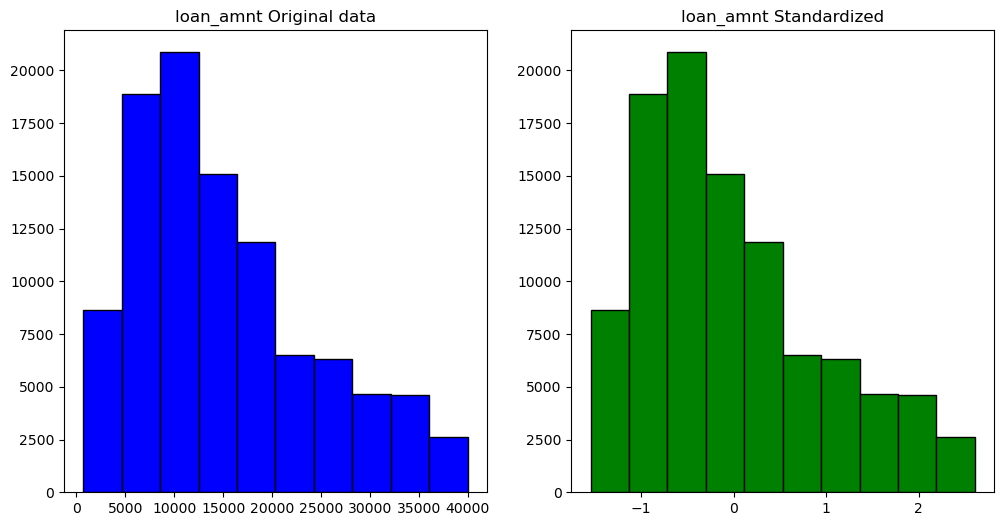

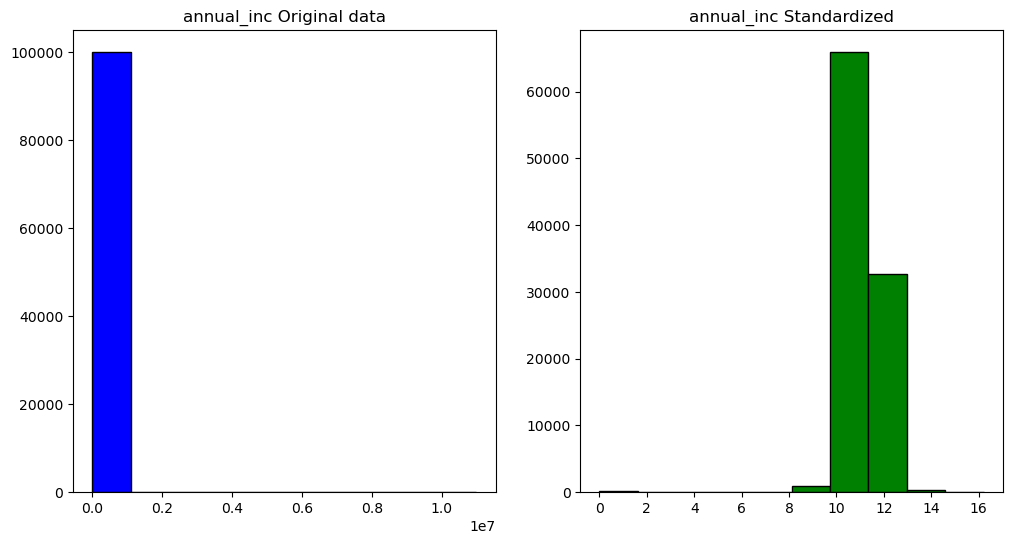

loan_amnt Skewness before Standardized: 0.7887250378394999
loan_amnt Skewness after Standardized: 0.7887250378395001
annual_inc Skewness before Standardized: 47.014849706413735
annual_inc Skewness after Standardizedm: 47.01484970641376


In [50]:

from sklearn.preprocessing import StandardScaler

# Log transformation
df[['loan_amnt_std', 'annual_inc_std']] = scaler.fit_transform(df[['loan_amnt', 'annual_inc']])

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['loan_amnt'], bins=10, color='blue', edgecolor='black')
plt.title('loan_amnt Original data')

plt.subplot(1, 2, 2)
plt.hist(df['loan_amnt_std'], bins=10, color='green', edgecolor='black')
plt.title('loan_amnt Standardized')

plt.show()

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['annual_inc'], bins=10, color='blue', edgecolor='black')
plt.title('annual_inc Original data')

plt.subplot(1, 2, 2)
plt.hist(df['annual_inc_log'], bins=10, color='green', edgecolor='black')
plt.title('annual_inc Standardized')

plt.show()

print(f"loan_amnt Skewness before Standardized: {skew(df['loan_amnt'])}")
print(f"loan_amnt Skewness after Standardized: {skew(df['loan_amnt_std'])}")

print(f"annual_inc Skewness before Standardized: {skew(df['annual_inc'])}")
print(f"annual_inc Skewness after Standardizedm: {skew(df['annual_inc_std'])}")

### Preparing modelling data

In [51]:
# dropping non default or non fully paid loans
status_to_drop = ['Current' ,'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
                  'Issued']

df2 = df[~df['loan_status'].isin(status_to_drop)].copy()
df2.shape, df2['loan_status'].unique()

((63689, 160),
 array(['Fully Paid', 'Charged Off', 'Default',
        'Does not meet the credit policy. Status:Fully Paid',
        'Does not meet the credit policy. Status:Charged Off'],
       dtype=object))

In [52]:
# renaming to simplify:
mapper ={
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Does not meet the credit policy. Status:Charged Off': 'Charged Off',
    'Default': 'Fully Paid'
}

df2['loan_status'] = df2['loan_status'].replace(mapper)
df2['loan_status'].unique()

# binary loan_status
df2['loan_status_binary'] = df2['loan_status'].replace({
    'Fully Paid': 0,
    'Charged Off': 1,
})

/var/folders/28/vl2dxjyx0fq84vlrqp4rsh_h0000gn/T/ipykernel_26844/3038128547.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['loan_status_binary'] = df2['loan_status'].replace({


In [53]:
vars_in_question = [
    'hardship_dpd',
    'loan_amnt', 
    'hardship_dpd', 
    'collection_recovery_fee',
    'recoveries',
    ]

for var in vars_in_question:
    df2[var + "_log"] = np.log1p(df2[var])

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


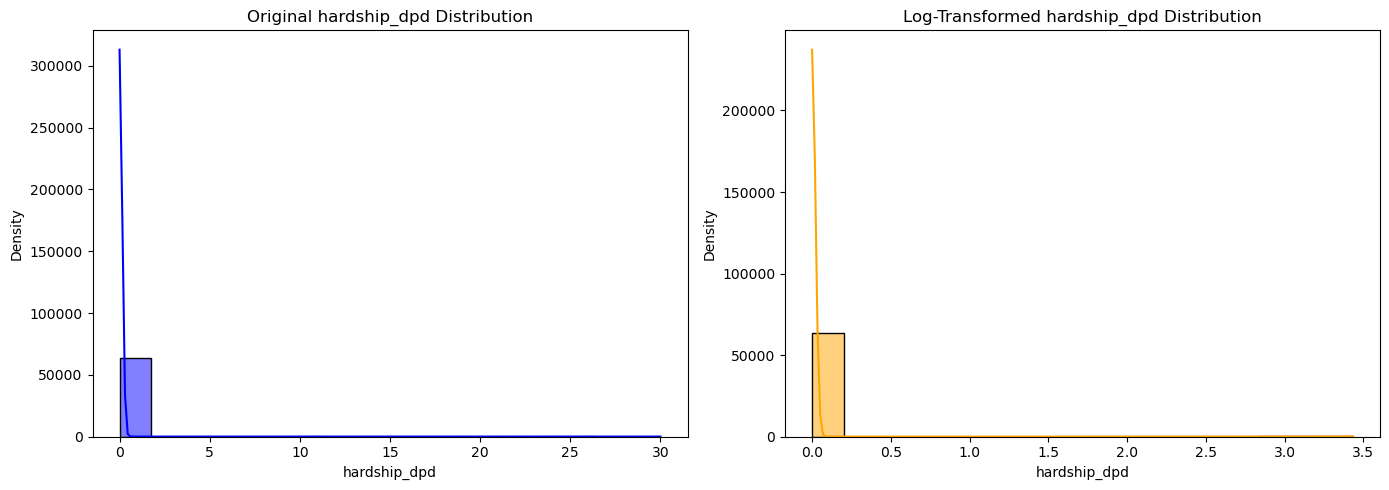

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


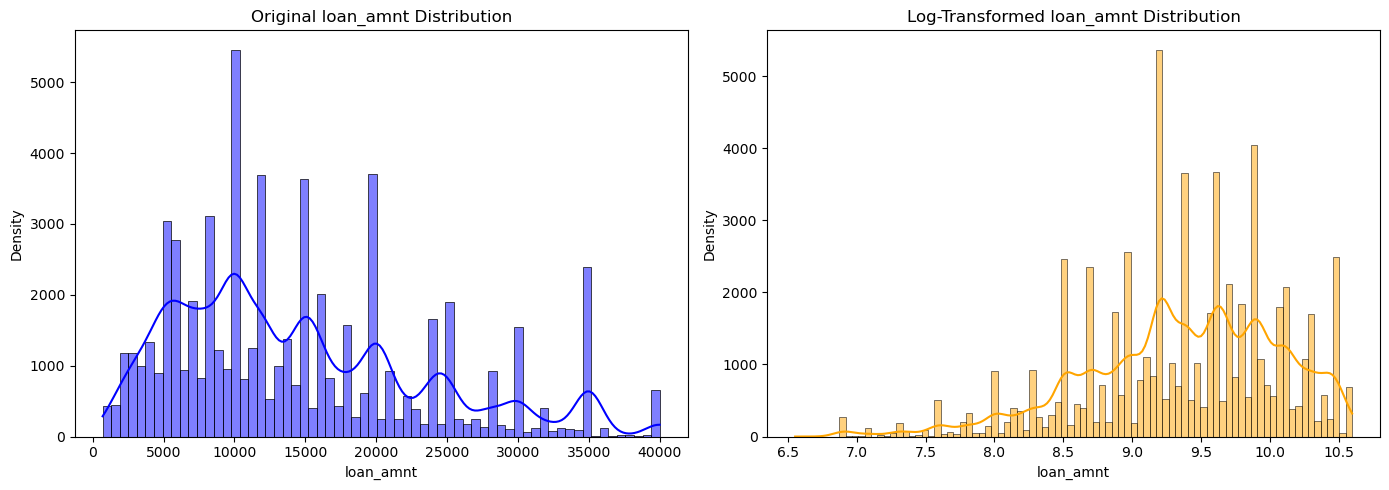

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


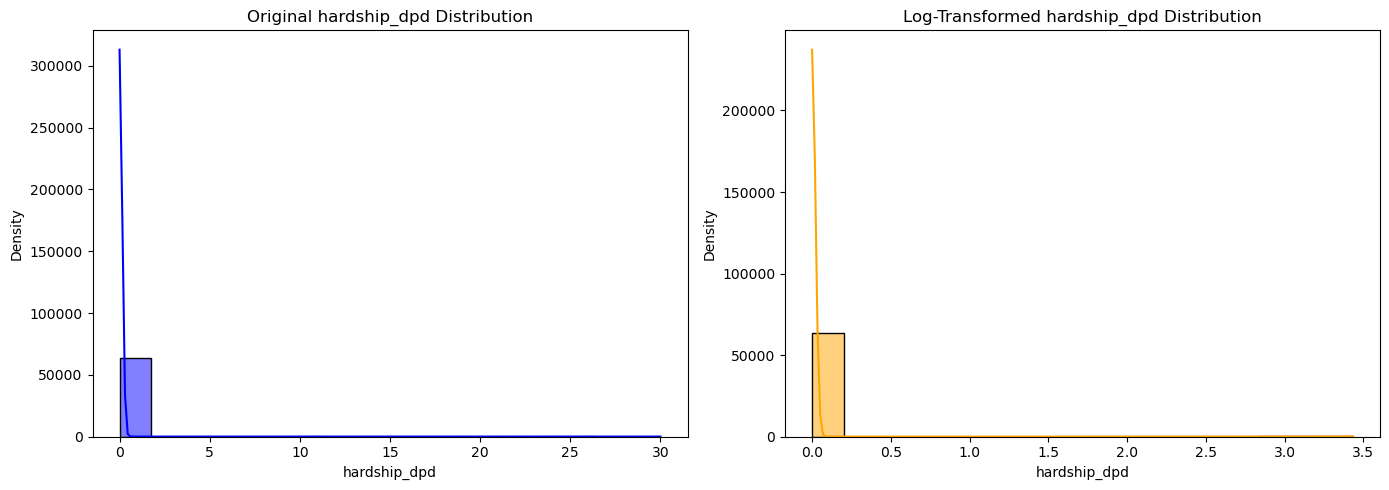

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


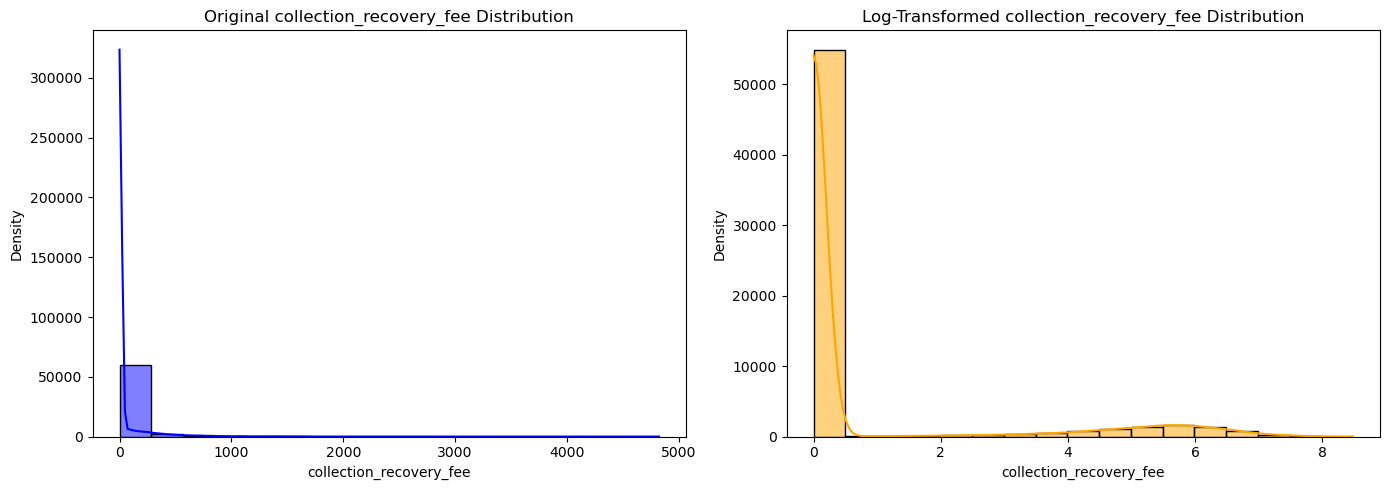

/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/EVLTR_DS_inFinance/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


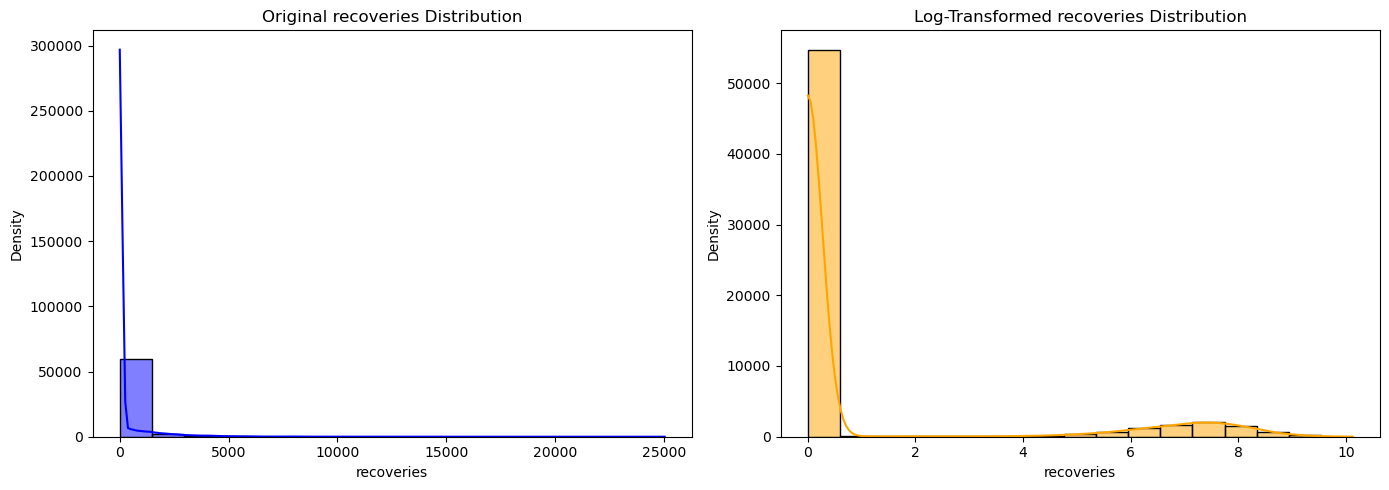

In [54]:
for var in vars_in_question:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Original distribution
    sns.histplot(df2[var], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Original {var} Distribution')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Density')

    # Log-transformed distribution
    sns.histplot(df2[var + '_log'], kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f'Log-Transformed {var} Distribution')
    axes[1].set_xlabel(var)
    axes[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

In [55]:
# df2.head().T.sort_index(ascending=True)

In [56]:
df2.to_csv("data/2-intermediate/out_df3.csv")

In [57]:
# ideal features:

feature_filter = [
'loan_status_binary',
'loan_amnt_log', 
'hardship_dpd_log', 
'collection_recovery_fee_log',
'recoveries_log',
'annual_inc_std',
'debt_to_income',
'delinq_2yrs',
'fico_range_high',
'fico_range_low',
'fico_range_change',
'percent_bc_gt_75',
'term_numeric',
'total_pymnt',
'tot_cur_bal',
'installment',
'int_rate_clean',
'grade_encoded',
]

In [1]:
# test

In [58]:
df2[feature_filter].head()

,loan_status_binary,loan_amnt_log,hardship_dpd_log,collection_recovery_fee_log,recoveries_log,annual_inc_std,debt_to_income,delinq_2yrs,fico_range_high,fico_range_low,fico_range_change,percent_bc_gt_75,term_numeric,total_pymnt,tot_cur_bal,installment,int_rate_clean,grade_encoded
2,0,8.517393,0.0,0.000000,0.0000,-0.286953,0.090909,0.0,669.0,665.0,-120.0,33.3,36,5846.672836,159131.0,162.49,0.1049,1
4,0,9.546884,0.0,0.000000,0.0000,-0.367206,0.291667,0.0,739.0,735.0,-40.0,0.0,60,16605.680000,90253.0,322.79,0.1359,2
5,1,8.294300,0.0,3.154316,4.8335,-0.390136,0.086957,0.0,704.0,700.0,200.0,0.0,36,3930.310000,16847.0,131.89,0.1149,1
6,0,8.881975,0.0,0.000000,0.0000,-0.539178,0.218182,0.0,684.0,680.0,-40.0,0.0,36,8426.779996,70443.0,246.01,0.1398,2
7,0,9.878221,0.0,0.000000,0.0000,0.217496,0.196970,0.0,669.0,665.0,-40.0,100.0,36,25051.898291,72077.0,697.86,0.1727,3


In [59]:
df2.head(2).to_clipboard()